In [1]:
#Import Library yang akan digunakan
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
#Menyiapkan data dan memanggil dataset
dataset = pd.read_csv('databaru1.csv')
dataset.keys()

Index(['Status', 'Hari', 'Total'], dtype='object')

In [3]:
dataku = pd.DataFrame(dataset)
dataku.head()

,Status,Hari,Total
0,Tetap,22,3529000
1,Tetap,22,3300000
2,Tetap,22,2725000
3,Tetap,20,2500000
4,Tetap,21,2550000


In [4]:
# Membaca data dari tabel
dataset = pd.read_csv('databaru1.csv')

# Menghapus kolom "Status"
dataset = dataset.drop("Status", axis=1)

# Menampilkan dataset setelah menghapus kolom
print(dataset.head())


   Hari    Total
0    22  3529000
1    22  3300000
2    22  2725000
3    20  2500000
4    21  2550000


In [5]:
X = np.asarray(dataset)
print(X)

[[     22 3529000]
 [     22 3300000]
 [     22 2725000]
 [     20 2500000]
 [     21 2550000]
 [     22 2813000]
 [     22 2813000]
 [     23 2850000]
 [     23 2850000]
 [     22 2813000]
 [     22 2825000]
 [     24 2900000]
 [     24 3100000]
 [     20 2160000]
 [     18 2000000]
 [     20 2200000]
 [     22 2560000]
 [     25 3200000]
 [     23 2800000]
 [     19 2050000]
 [     22 2560000]
 [     20 2150000]
 [     22 2500000]
 [     22 2800000]
 [     25 3560000]
 [     20 2520000]
 [     21 2700000]
 [     21 2750000]
 [     20 2600000]
 [     20 2600000]
 [     20 2520000]
 [     20 2520000]
 [     25 2200000]
 [     20 1800000]
 [     20 1850000]
 [     20 1800000]
 [     19 1750000]
 [     18 1800000]
 [     18 1836000]
 [     18 1850000]
 [     18 1830000]
 [     25 2200000]
 [     25 2250000]
 [     22 2100000]
 [     18 1750000]
 [     20 1800000]
 [     20 1830000]
 [     18 1710000]
 [     19 1750000]
 [     20 1800000]]


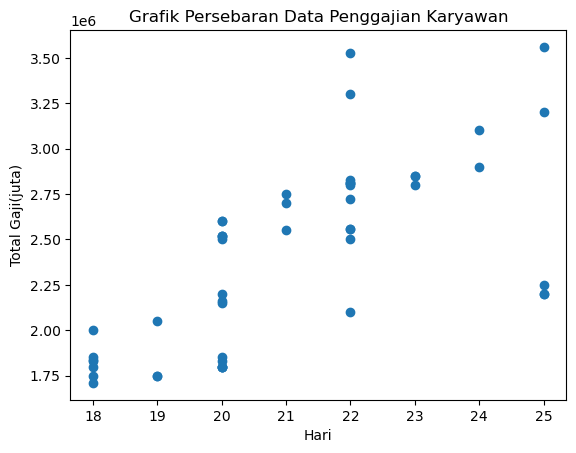

In [6]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel("Hari")
plt.ylabel("Total Gaji(juta)")
plt.title("Grafik Persebaran Data Penggajian Karyawan")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
y_predicted = kmeans.fit_predict(X)
y_predicted
 
dataset['tipePenghasilan'] = y_predicted

In [9]:
print(kmeans.cluster_centers_)

[[2.15454545e+01 2.68495455e+06]
 [2.00000000e+01 1.93330435e+06]
 [2.36000000e+01 3.33780000e+06]]


In [10]:
dataset

,Hari,Total,tipePenghasilan
0,22,3529000,2
1,22,3300000,2
2,22,2725000,0
3,20,2500000,0
4,21,2550000,0
5,22,2813000,0
6,22,2813000,0
7,23,2850000,0
8,23,2850000,0
9,22,2813000,0


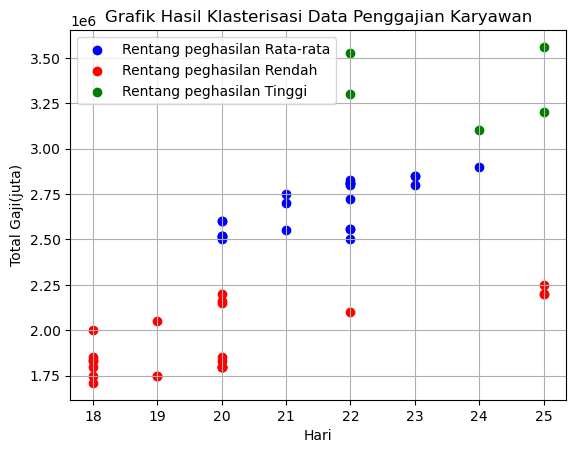

In [11]:
df1 = dataset[dataset.tipePenghasilan==0]
df2 = dataset[dataset.tipePenghasilan==1]
df3 = dataset[dataset.tipePenghasilan==2]
 
plt.scatter(df1.Hari,df1['Total'],color='blue',label='Rentang peghasilan Rata-rata')
plt.scatter(df2.Hari,df2['Total'],color='red',label='Rentang peghasilan Rendah')
plt.scatter(df3.Hari,df3['Total'],color='green',label='Rentang peghasilan Tinggi')

plt.xlabel("Hari")
plt.ylabel("Total Gaji(juta)")
plt.title("Grafik Hasil Klasterisasi Data Penggajian Karyawan")
plt.grid()

plt.legend()
plt.show()

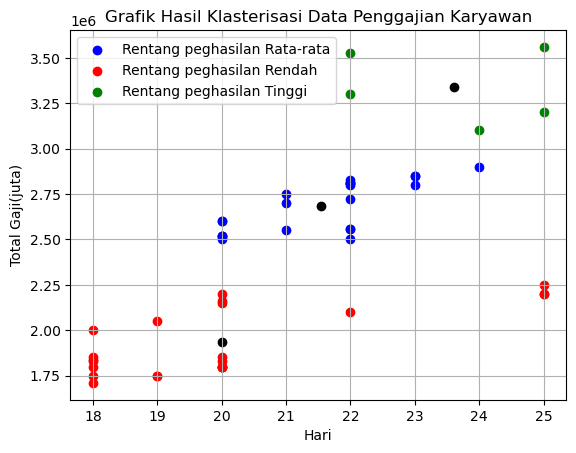

In [12]:
#plot data point
#memvisualisasikan hasil klasterisasi dengan "centroid" dari masing masing klaster
df1 = dataset[dataset.tipePenghasilan==0]
df2 = dataset[dataset.tipePenghasilan==1]
df3 = dataset[dataset.tipePenghasilan==2]
 
plt.scatter(df1.Hari,df1['Total'],color='blue',label='Rentang peghasilan Rata-rata')
plt.scatter(df2.Hari,df2['Total'],color='red',label='Rentang peghasilan Rendah')
plt.scatter(df3.Hari,df3['Total'],color='green',label='Rentang peghasilan Tinggi')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")

plt.xlabel("Hari")
plt.ylabel("Total Gaji(juta)")
plt.title("Grafik Hasil Klasterisasi Data Penggajian Karyawan")
plt.grid()

plt.legend()
plt.show()

In [13]:
conditions = [
    (dataset['tipePenghasilan']==0),
    (dataset['tipePenghasilan']==1),
    (dataset['tipePenghasilan']==2)]
choices = ['Rata-rata','Rendah','Tinggi']
dataset['tipePenghasilan'] = np.select(conditions, choices)

In [14]:
dataset

,Hari,Total,tipePenghasilan
0,22,3529000,Tinggi
1,22,3300000,Tinggi
2,22,2725000,Rata-rata
3,20,2500000,Rata-rata
4,21,2550000,Rata-rata
5,22,2813000,Rata-rata
6,22,2813000,Rata-rata
7,23,2850000,Rata-rata
8,23,2850000,Rata-rata
9,22,2813000,Rata-rata
